<a href="https://colab.research.google.com/github/deibiarcon/deibiarcon/blob/main/Analisis_juegos_olimpicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy  import stats

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Notebooks/athlete_events.csv")
data.head(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold


In [4]:
data.shape

(271116, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,68248.954396,25.556898,175.33897,70.702393,1978.378480
std,39022.286345,6.280857,9.27810,12.574690,29.877632
min,1.000000,10.000000,127.00000,25.000000,1896.000000
25%,34643.000000,22.000000,170.00000,63.000000,1960.000000
50%,68205.000000,25.000000,175.33897,70.702393,1988.000000
75%,102097.250000,28.000000,180.00000,75.000000,2002.000000
max,135571.000000,97.000000,226.00000,214.000000,2016.000000


In [ ]:
serr = pd.Series([1,2,3,np.NaN,5])
serr.fillna(serr.mean())
serr.mean()

2.75

In [17]:

data_numer = data.select_dtypes(include=['number'])

for column in data_numer.columns:
  data[column] = data[column].fillna(data[column].mean())



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [16]:
data['Medal'] = data['Medal'].fillna('No Data')

<Axes: xlabel='Age', ylabel='Count'>

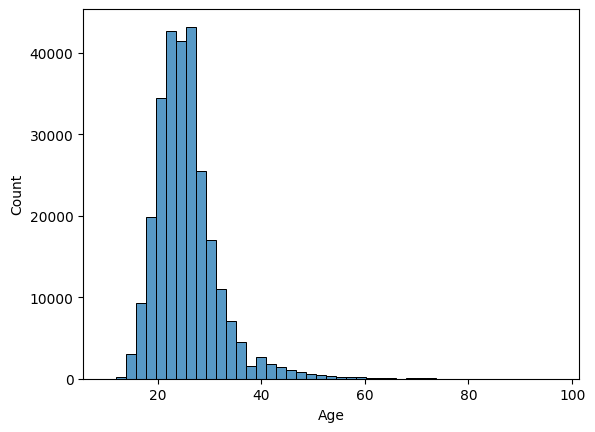

In [ ]:
sns.histplot(data=data, x = 'Age', bins = 45)

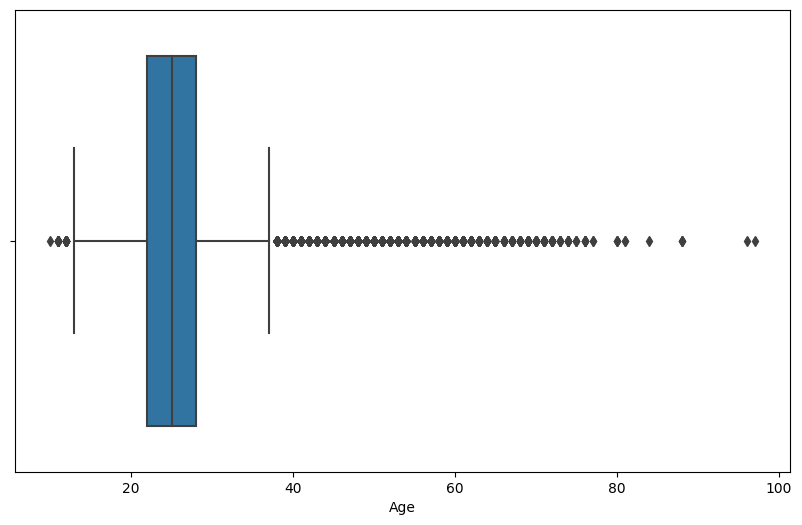

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x = data["Age"])
plt.show()

In [ ]:
stats.iqr(data["Age"])

6.0

In [ ]:
28 + (1.5*6)

37.0

In [ ]:
22 - (1.5*6)

13.0

In [ ]:
old_atletc = data[data["Age"] > 37]
old_atletc.shape

(11928, 15)

In [ ]:
young_atletac= data[data["Age"] < 13]
young_atletac.shape

(53, 15)

In [ ]:
old_atletc['Sport'].value_counts().head()

Shooting            3178
Art Competitions    2226
Equestrianism       1997
Sailing             1040
Fencing             1031
Name: Sport, dtype: int64

In [ ]:
young_atletac['Sport'].value_counts().head()

Swimming          25
Figure Skating    15
Rowing             5
Gymnastics         5
Athletics          2
Name: Sport, dtype: int64

In [6]:
text_colum = data.select_dtypes(include = [object])
text_colum.columns

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [7]:
for i in text_colum.columns:
  if i != "Name":
    print(data[i].value_counts().head())
    print()


M    196594
F     74522
Name: Sex, dtype: int64

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: Team, dtype: int64

USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: NOC, dtype: int64

2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
Name: Games, dtype: int64

Summer    222552
Winter     48564
Name: Season, dtype: int64

London            22426
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Name: City, dtype: int64

Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: Sport, dtype: int64

Football Men's Football        5733
Ice Hockey Men's Ice Hockey    4762
Hockey Men's Hockey            3958
Water Polo Men's Water Polo    3358
Basketball Men's Basketball    3280
Name: Event, dtype: int64

Gold      13372
Bronze    13295
Silver    1311

In [10]:
data.groupby('Year')[['Age','Height','Weight']].agg(['min','max','mean']).tail()

Age                  Height                    Weight                  
       min   max       mean    min    max        mean    min    max       mean
Year                                                                          
2008  12.0  67.0  25.734118  137.0  226.0  176.211062   28.0  214.0  71.397679
2010  15.0  51.0  26.124262  149.0  206.0  174.918182   38.0  116.0  70.740863
2012  13.0  71.0  25.961378  140.0  221.0  176.262469   33.0  214.0  71.319586
2014  15.0  55.0  25.987324  146.0  206.0  174.816670   41.0  116.0  70.760111
2016  13.0  62.0  26.207919  133.0  218.0  176.034266   30.0  170.0  70.988637

In [12]:
data.groupby(['Season','Sex'])['Age'].agg(['min','max','mean']).head()

min   max       mean
Season Sex                       
Summer F    11.0  74.0  23.660997
       M    10.0  97.0  26.443944
Winter F    11.0  48.0  24.014398
       M    12.0  58.0  25.504261

In [14]:
data.groupby(['Season','Sex'])[['Team','Sport','Event']].nunique()

Team  Sport  Event
Season Sex                    
Summer F     352     40    214
       M    1118     49    491
Winter F     144     14     57
       M     214     17     67

In [19]:
data.groupby(['Medal','Season','Sex'])[['Age','Height','Weight']].mean()

Age      Height     Weight
Medal   Season Sex                                  
Bronze  Summer F    24.634359  171.183455  64.052365
               M    26.323907  179.426277  76.387936
        Winter F    25.115578  167.403429  61.382748
               M    26.384883  178.890860  77.100403
Gold    Summer F    24.213271  171.665372  64.378546
               M    26.473703  179.872225  76.872683
        Winter F    25.202636  167.619718  62.426866
               M    26.596487  179.537387  77.784048
No Data Summer F    23.540824  168.357685  60.593038
               M    26.382399  177.587796  73.735763
        Winter F    23.855208  167.406713  60.885655
               M    25.377882  177.842456  74.832962
Silver  Summer F    24.292628  171.391190  64.056271
               M    26.627032  179.483286  76.488482
        Winter F    25.240527  167.974450  62.260945
               M    26.430566  179.085914  77.253308

GRAFICAS

<Axes: xlabel='Height', ylabel='Weight'>

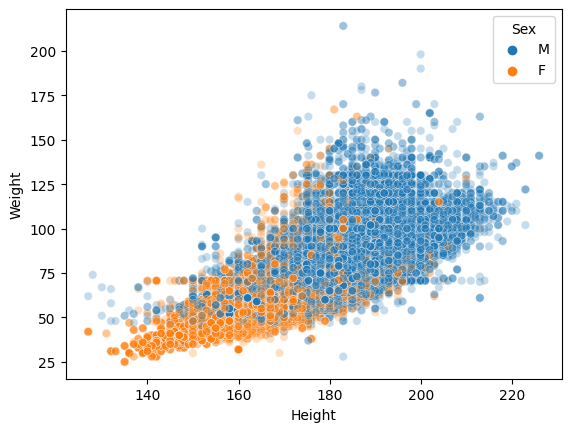

In [23]:
sns.scatterplot(data=data, x='Height', y='Weight', hue='Sex', alpha=0.25)

In [26]:
data[["Age","Height","Weight"]].corr()

,Age,Height,Weight
Age,1.000000,0.106944,0.161847
Height,0.106944,1.000000,0.786609
Weight,0.161847,0.786609,1.000000


<Axes: >

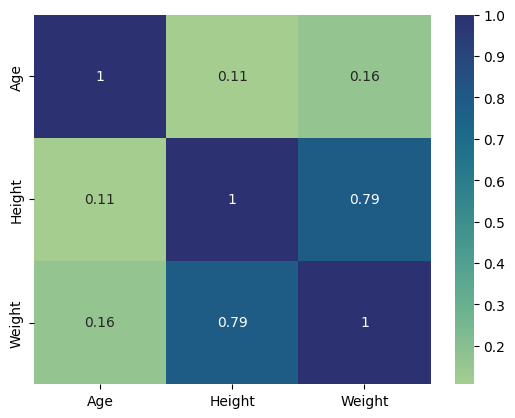

In [31]:
sns.heatmap(data[["Age","Height","Weight"]].corr(), annot=True, cmap='crest')

<Axes: xlabel='Age', ylabel='Count'>

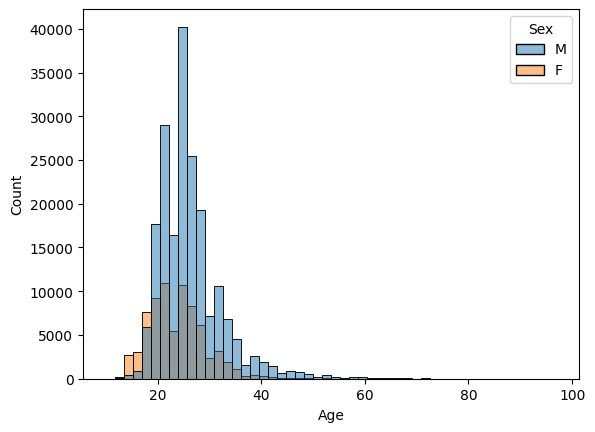

In [34]:
sns.histplot(data=data, x='Age', hue='Sex', bins=50)

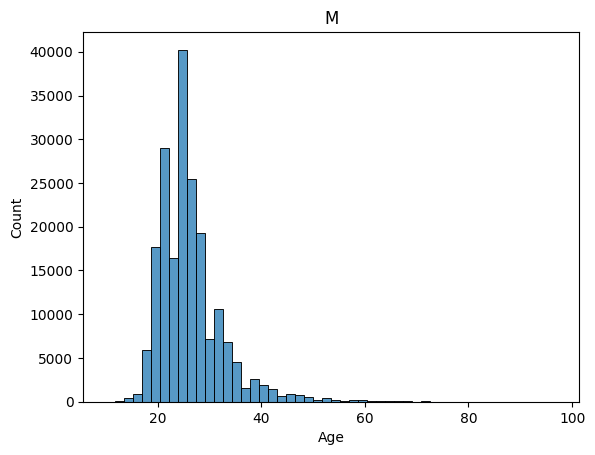

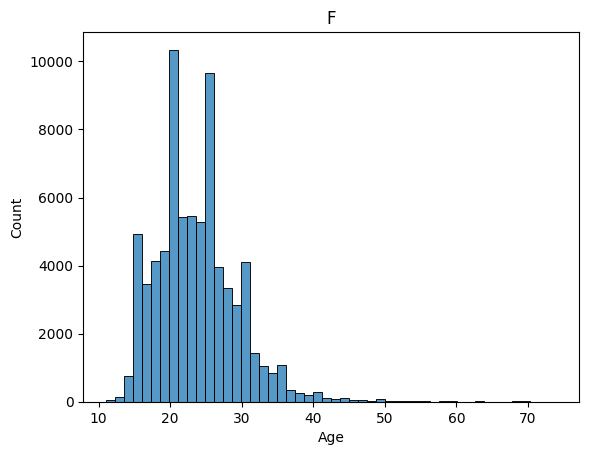

In [37]:
for value in data['Sex'].value_counts().index:
  sns.histplot(data=data[data['Sex']== value], x='Age', bins=50)
  plt.title(value)
  plt.show()

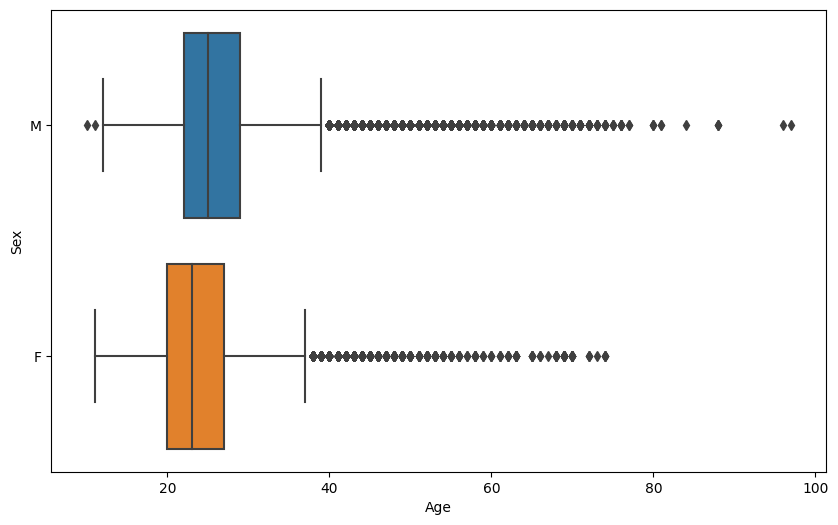

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Age', y='Sex')
plt.show()

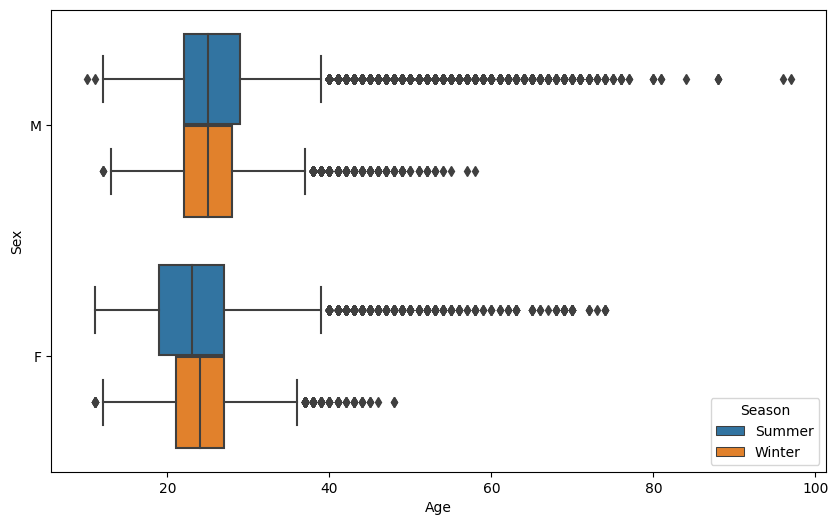

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Age', y='Sex',hue='Season')
plt.show()

<Axes: xlabel='Age', ylabel='Sex'>

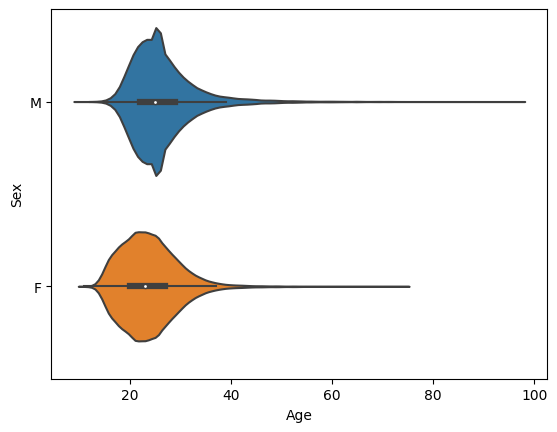

In [45]:
sns.violinplot(data=data, x = 'Age', y='Sex')

<Axes: xlabel='Year', ylabel='Age'>

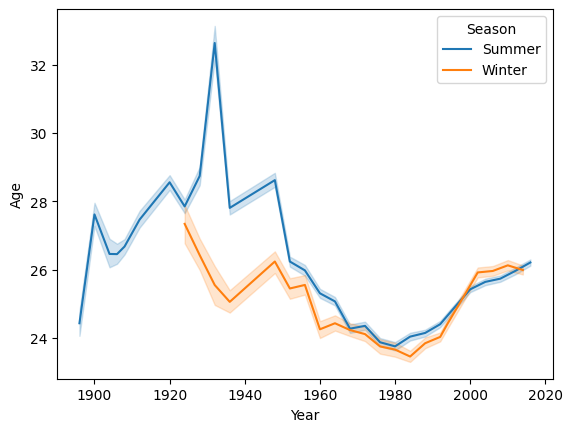

In [47]:
sns.lineplot(data=data, x='Year', y='Age', hue='Season')